<a class="anchor" id="0"></a>
# **Arbres de classificació amb Python**




<a class="anchor" id="0.1"></a>
# **Índex**



1.	[Importació de les llibreries i el dataset](#1)
2.	[Exploració de les dades](#2)
3.	[Declare feature vector and target variable](#3)
4.	[Split data into separate training and test set](#4)
5.	[Feature engineering](#5)
6.	[Decision Tree classifier with criterion entropy](#6)
7.	[Confusion matrix](#7)
8.	[Classification report](#8)
9.	[Results and conclusion](#9)




# **1. Importació de les llibreries i el dataset** <a class="anchor" id="1"></a>

[Índex](#0.1)

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/dades-cotxes/car_evaluation.csv


In [2]:
dades = '/kaggle/input/dades-cotxes/car_evaluation.csv'

df = pd.read_csv(dades)

# **2. Exploració de les dades** <a class="anchor" id="2"></a>

[Índex](#0.1)


In [3]:
print(df.shape)
df.head()

(1728, 7)


,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


### View summary of dataset

In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
buying      1728 non-null object
maint       1728 non-null object
doors       1728 non-null object
persons     1728 non-null object
lug_boot    1728 non-null object
safety      1728 non-null object
class       1728 non-null object
dtypes: object(7)
memory usage: 94.6+ KB


,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,med,med,4,more,med,med,unacc
freq,432,432,432,576,576,576,1210


### Frequency distribution of values in variables

Now, I will check the frequency counts of categorical variables.

In [5]:
for col in df.columns: 
    print(df[col].value_counts())


med      432
vhigh    432
high     432
low      432
Name: buying, dtype: int64
med      432
vhigh    432
high     432
low      432
Name: maint, dtype: int64
4        432
5more    432
2        432
3        432
Name: doors, dtype: int64
more    576
4       576
2       576
Name: persons, dtype: int64
med      576
small    576
big      576
Name: lug_boot, dtype: int64
med     576
high    576
low     576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


We can see that the `doors` and `persons` are categorical in nature. So, I will treat them as categorical variables.

### Summary of variables


- There are 7 variables in the dataset. All the variables are of categorical data type.


- These are given by `buying`, `maint`, `doors`, `persons`, `lug_boot`, `safety` and `class`.


- `class` is the target variable.

### Explore `class` variable

In [6]:
df['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

The `class` target variable is ordinal in nature.

### Missing values in variables

In [7]:
# check missing values in variables

df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

We can see that there are no missing values in the dataset. I have checked the frequency distribution of values previously. It also confirms that there are no missing values in the dataset.

# **10. Declare feature vector and target variable** <a class="anchor" id="10"></a>

[Table of Contents](#0.1)

In [8]:
X = df.drop(['class'], axis=1)

y = df['class']

# **11. Split data into separate training and test set** <a class="anchor" id="11"></a>

[Table of Contents](#0.1)

In [9]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)


In [10]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((1157, 6), (571, 6))

# **12. Feature Engineering** <a class="anchor" id="12"></a>

[Table of Contents](#0.1)


**Feature Engineering** is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of variables.


First, I will check the data types of variables again.

In [11]:
# check data types in X_train

X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

### Encode categorical variables


Now, I will encode the categorical variables.

In [12]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,vhigh,vhigh,3,more,med,low
468,high,vhigh,3,4,small,low
155,vhigh,high,3,more,small,high
1721,low,low,5more,more,small,high
1208,med,low,2,more,small,high


We can see that all  the variables are ordinal categorical data type.

In [13]:
# import category encoders

import category_encoders as ce

In [14]:
# encode variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [15]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,1,1,1,1,1,1
468,2,1,1,2,2,1
155,1,2,1,1,2,2
1721,3,3,2,1,2,2
1208,4,3,3,1,2,2


In [16]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,4,3,1,2
1201,4,3,3,2,1,3
628,2,2,2,3,3,3
1498,3,2,2,2,1,3
1263,4,3,4,1,1,1


We now have training and test set ready for model building. 

In [17]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier


# **14. Decision Tree Classifier with criterion entropy** <a class="anchor" id="14"></a>

[Table of Contents](#0.1)

In [18]:
# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0)

# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

### Predict the Test set results with criterion entropy

In [19]:
y_pred_en = clf_en.predict(X_test)

### Check accuracy score with criterion entropy

In [20]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.9475


### Compare the train-set and test-set accuracy


Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [21]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array(['unacc', 'unacc', 'unacc', ..., 'acc', 'unacc', 'acc'],
      dtype=object)

In [22]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.9870


### Check for overfitting and underfitting

In [23]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.9870
Test set score: 0.9475


We can see that the training-set score and test-set score is same as above. The training-set accuracy score is 0.7865 while the test-set accuracy to be 0.8021. These two values are quite comparable. So, there is no sign of overfitting. 


### Visualize decision-trees

[Text(254.3419014084507, 415.1127272727273, 'X[5] <= 1.5\nentropy = 1.2\nsamples = 1157\nvalue = [255, 49, 813, 40]'),
 Text(244.91091549295774, 375.5781818181818, 'entropy = 0.0\nsamples = 386\nvalue = [0, 0, 386, 0]'),
 Text(263.7728873239437, 375.5781818181818, 'X[3] <= 2.5\nentropy = 1.474\nsamples = 771\nvalue = [255, 49, 427, 40]'),
 Text(254.3419014084507, 336.0436363636364, 'X[0] <= 2.5\nentropy = 1.638\nsamples = 525\nvalue = [255, 49, 181, 40]'),
 Text(75.44788732394366, 296.5090909090909, 'X[1] <= 1.5\nentropy = 0.995\nsamples = 271\nvalue = [124, 0, 147, 0]'),
 Text(66.0169014084507, 256.9745454545455, 'entropy = 0.0\nsamples = 68\nvalue = [0, 0, 68, 0]'),
 Text(84.87887323943661, 256.9745454545455, 'X[5] <= 2.5\nentropy = 0.964\nsamples = 203\nvalue = [124, 0, 79, 0]'),
 Text(37.72394366197183, 217.44, 'X[1] <= 2.5\nentropy = 0.714\nsamples = 102\nvalue = [82, 0, 20, 0]'),
 Text(18.861971830985915, 177.90545454545457, 'X[0] <= 1.5\nentropy = 0.989\nsamples = 32\nvalue = [1

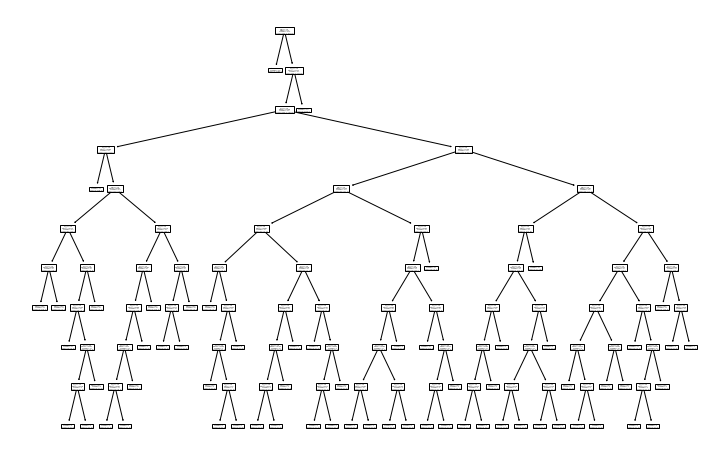

In [24]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train)) 

### Visualize decision-trees with graphviz

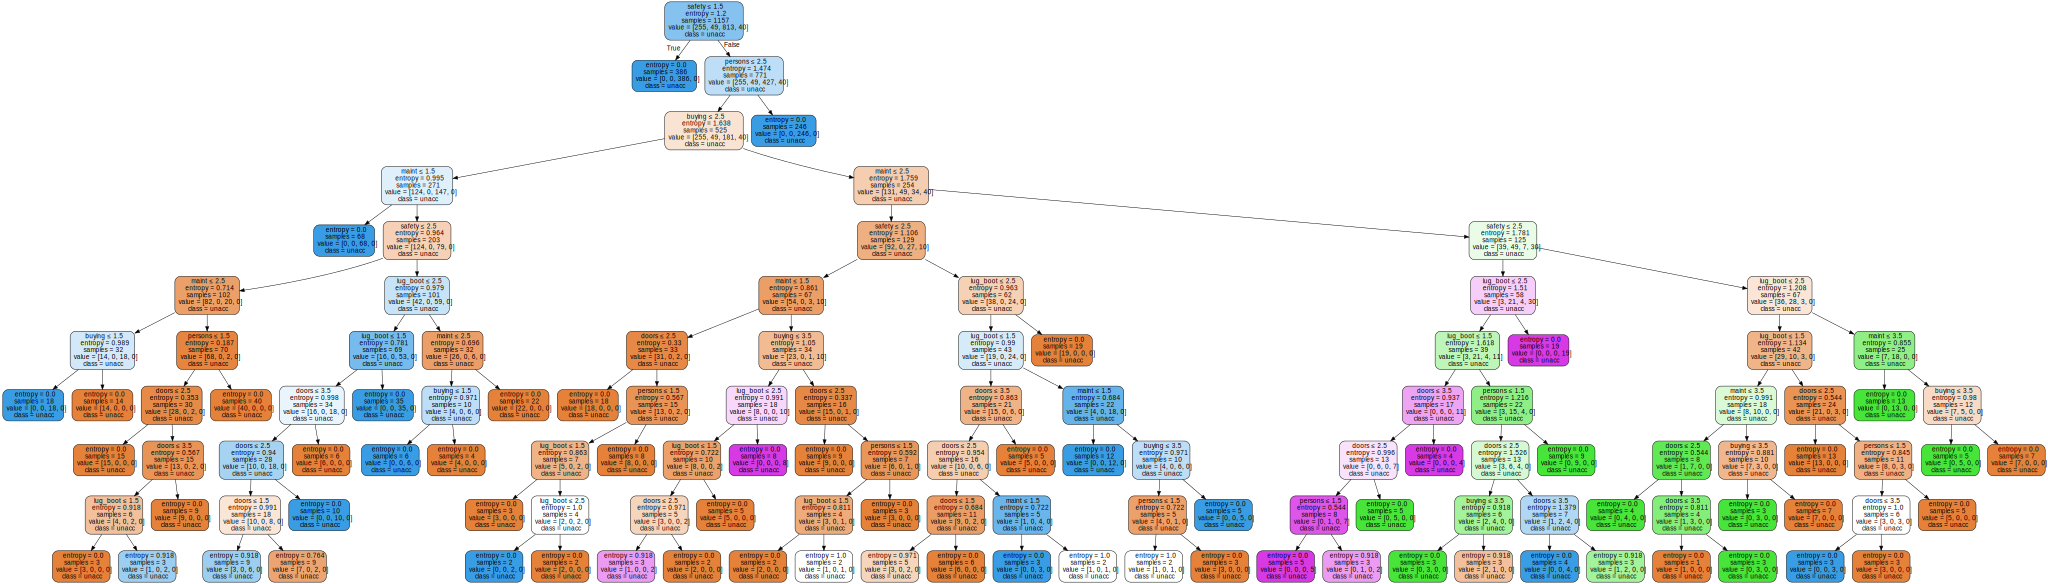

In [25]:
import graphviz 
dot_data = tree.export_graphviz(clf_en, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph 

Now, based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.


But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors our classifer is making. 


We have another tool called `Confusion matrix` that comes to our rescue.

# **15. Confusion matrix** <a class="anchor" id="15"></a>

[Table of Contents](#0.1)


A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.


Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-


**True Positives (TP)** – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.


**True Negatives (TN)** – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.


**False Positives (FP)** – False Positives occur when we predict an observation belongs to a    certain class but the observation actually does not belong to that class. This type of error is called **Type I error.**



**False Negatives (FN)** – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called **Type II error.**



These four outcomes are summarized in a confusion matrix given below.


In [26]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)



Confusion matrix

 [[110  11   7   1]
 [  1  17   0   2]
 [  6   0 391   0]
 [  2   0   0  23]]


# **16. Classification Report** <a class="anchor" id="16"></a>

[Table of Contents](#0.1)


**Classification report** is another way to evaluate the classification model performance. It displays the  **precision**, **recall**, **f1** and **support** scores for the model. I have described these terms in later.

We can print a classification report as follows:-

In [27]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

         acc       0.92      0.85      0.89       129
        good       0.61      0.85      0.71        20
       unacc       0.98      0.98      0.98       397
       vgood       0.88      0.92      0.90        25

    accuracy                           0.95       571
   macro avg       0.85      0.90      0.87       571
weighted avg       0.95      0.95      0.95       571



# **17. Results and conclusion** <a class="anchor" id="17"></a>

[Table of Contents](#0.1)


1.	In this project, I build a Decision-Tree Classifier model to predict the safety of the car. I build two models, one with criterion `gini index` and another one with criterion `entropy`. The model yields a very good performance as indicated by the model accuracy in both the cases which was found to be 0.8021.
2.	In the model with criterion `gini index`, the training-set accuracy score is 0.7865 while the test-set accuracy to be 0.8021. These two values are quite comparable. So, there is no sign of overfitting.
3.	Similarly, in the model with criterion `entropy`, the training-set accuracy score is 0.7865 while the test-set accuracy to be 0.8021.We get the same values as in the case with criterion `gini`. So, there is no sign of overfitting.
4.	In both the cases, the training-set and test-set accuracy score is the same. It may happen because of small dataset.
5.	The confusion matrix and classification report yields very good model performance.

# **18. References** <a class="anchor" id="18"></a>

[Table of Contents](#0.1)


The work done in this project is inspired from following books and websites:-

1. Hands on Machine Learning with Scikit-Learn and Tensorflow by Aurélién Géron

2. Introduction to Machine Learning with Python by Andreas C. Müller and Sarah Guido

3. https://en.wikipedia.org/wiki/Decision_tree

4. https://en.wikipedia.org/wiki/Information_gain_in_decision_trees

5. https://en.wikipedia.org/wiki/Entropy_(information_theory)

6. https://www.datacamp.com/community/tutorials/decision-tree-classification-python

7. https://stackabuse.com/decision-trees-in-python-with-scikit-learn/

8. https://acadgild.com/blog/decision-tree-python-code


So, now we will come to the end of this kernel.

I hope you find this kernel useful and enjoyable.
	
Your comments and feedback are most welcome.

Thank you


[Go to Top](#0)